Signed changes 

In [1]:
import numpy as np
from scipy.io import loadmat
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_palette("colorblind")
sns.set_context("poster")

import sys
from data_utils import get_per_mouse_boutons, load_data

In [ ]:
def compute_angle(x, y, in_degrees=True):
    angle_in_radians = np.arccos(x@y / (x@x * y@y)**0.5)
    if in_degrees:
        return angle_in_radians * 180/np.pi
    else:
        return angle_in_radians

In [32]:


# Compute angle between avg. response for specific stimulus
# and NP/NR boutons 
def get_learning_angles(stim, expt = 'AFC'):
    responses = ['exc', 'inh']
    hab_rec = {} # angle between avg. habituation and avg. recall vecgtors
    for resp in responses:
        Xr, yr = get_per_mouse_boutons("rec", f"../data/per_mouse/{expt}_{resp}_{stim}/")
        Xa, ya = get_per_mouse_boutons("acq", f"../data/per_mouse/{expt}_{resp}_{stim}/")
        Xh, yh = get_per_mouse_boutons("hab", f"../data/per_mouse/{expt}_{resp}_{stim}/")

        mouse_ids = Xr.keys()
        n_mice = len(mouse_ids)
        n_trials = 15

        hab_rec[resp] = np.zeros((n_mice, ))



        for m, mouse_id in enumerate(mouse_ids):
            # Mean during habituation vs mean during recall
            hab_rec[resp][m] = compute_angle(Xh[mouse_id][:,12:21].mean((0,1)),  Xr[mouse_id][:,12:21].mean((0,1)))
            
    return hab_rec


In [62]:
pc_angles = {}
afc_angles = {}
for stim in ['cs1', 'cs2']:
    pc_angles[stim] = get_learning_angles(stim, 'Pseudo')
    
for stim in ['csm', 'csp']:
    afc_angles[stim] = get_learning_angles(stim, 'AFC')

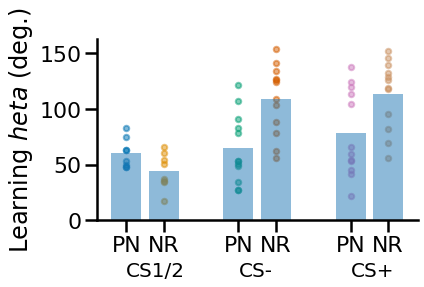

In [100]:
# plot them
color = 'tab:blue'
alpha = 0.5
s = 30

for i, resp in enumerate(['exc', 'inh']):
    pc_avg = (pc_angles['cs1'][resp]+ pc_angles['cs2'][resp])/2
    plt.bar(i, pc_avg.mean(), color=color, alpha=alpha)
    plt.scatter([i] * len(pc_avg), pc_avg, s=s, alpha=alpha)

# means    
plt.bar(3, afc_angles['csm']['exc'].mean(), color=color, alpha=alpha)
plt.bar(4, afc_angles['csm']['inh'].mean(), color=color, alpha=alpha)

plt.bar(6, afc_angles['csp']['exc'].mean(), color=color, alpha=alpha)
plt.bar(7, afc_angles['csp']['inh'].mean(), color=color, alpha=alpha) 

# individual mice
plt.scatter([3]* len(afc_angles['csm']['exc']), afc_angles['csm']['exc'], s=s, alpha=alpha)
plt.scatter([4]* len(afc_angles['csm']['inh']), afc_angles['csm']['inh'], s=s, alpha=alpha)

plt.scatter([6]* len(afc_angles['csp']['exc']), afc_angles['csp']['exc'], s=s, alpha=alpha)
plt.scatter([7]* len(afc_angles['csp']['inh']), afc_angles['csp']['inh'], s=s, alpha=alpha)

plt.xticks([0, 1, 3, 4, 6, 7], ['PN', 'NR']*3)
plt.text(0, -50, "CS1/2", fontsize=20)
plt.text(3, -50, "CS-", fontsize=20)
plt.text(6, -50, "CS+", fontsize=20)

plt.ylabel(f"Learning $\theta$ (deg.)")

sns.despine()
plt.tight_layout()